---

## S&P 500 Portfolio Optimization 
#### (Draft, i.e. not weighted by float adj. mkt cap)

In [2]:
# Import required libraries and dependencies
from pathlib import Path
import seaborn as sns
import pandas as pd
import bs4 as bs
import datetime as dt
import os
from pandas_datareader import data as pdr
import pickle
import requests
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np

In [3]:
# Itdentify current S&P Tickers from Wikipedia
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

In [4]:
# Store S&P 500 tickers & pull data from July 1, 2019 through today
yf.pdr_override()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2019, 7, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

save_sp500_tickers()
get_data_from_yahoo()


MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
ADS
Already have ADS
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Already have AOS
APA
Already have APA
AIV
Alre

In [5]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                   MMM        ABT       ABBV        ABMD         ACN  \
Date                                                                   
2019-07-01  168.236160  83.134003  68.268700  265.019989  184.521378   
2019-07-02  167.763763  83.586617  69.040672  261.489990  186.229645   
2019-07-03  168.689255  84.265549  69.719627  261.329987  188.569839   
2019-07-05  165.816376  84.049072  67.887352  261.470001  188.984573   
2019-07-08  163.107407  83.724373  66.241096  257.779999  187.918152   

                 ATVI        ADBE        AMD         AAP        AES  ...  \
Date                                                                 ...   
2019-07-01  47.189640  300.970001  31.200001  155.488846  16.224052  ...   
2019-07-02  47.666504  301.390015  31.240000  158.666321  16.398190  ...  

In [6]:
sp500_data = Path("sp500_joined_closes.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [7]:
# Sort the dataframe based on Date index, & display a few rows to validate 
sp500_df.sort_index(ascending=True,inplace=True)
sp500_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,168.236160,83.134003,68.268700,265.019989,184.521378,47.189640,300.970001,31.200001,155.488846,16.224052,...,127.842575,57.907276,34.662178,119.219955,83.307114,107.579842,208.979996,116.385406,44.789215,112.914780
2019-07-02,167.763763,83.586617,69.040672,261.489990,186.229645,47.666504,301.390015,31.240000,158.666321,16.398190,...,129.517929,58.608826,34.088299,115.726509,82.083321,108.965256,211.610001,115.809982,43.358429,113.928894
2019-07-03,168.689255,84.265549,69.719627,261.329987,188.569839,48.342064,305.700012,31.190001,159.500427,16.717447,...,129.917282,59.154476,34.891727,114.535797,82.241226,109.043854,217.529999,116.722733,43.861137,114.674568
2019-07-05,165.816376,84.049072,67.887352,261.470001,188.984573,47.835396,303.980011,31.500000,159.490479,16.562658,...,129.362076,59.134987,34.853470,114.260246,81.757629,108.316765,217.039993,116.881462,44.673203,113.521263
2019-07-08,163.107407,83.724373,66.241096,257.779999,187.918152,46.166374,302.920013,32.040001,157.077591,16.591679,...,129.605576,59.290886,34.107430,114.083115,80.632523,108.130089,210.440002,119.748695,43.812801,113.441727


In [8]:
# Calculate daily returns for ~TTM of every stock in the S&P500
daily_returns = sp500_df.pct_change()
daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,-0.002808,0.005444,0.011308,-0.013320,0.009258,0.010105,0.001396,0.001282,0.020435,0.010733,...,0.013105,0.012115,-0.016556,-0.029303,-0.014690,0.012878,0.012585,-0.004944,-0.031945,0.008981
2019-07-03,0.005517,0.008122,0.009834,-0.000612,0.012566,0.014173,0.014300,-0.001600,0.005257,0.019469,...,0.003083,0.009310,0.023569,-0.010289,0.001924,0.000721,0.027976,0.007881,0.011594,0.006545
2019-07-05,-0.017031,-0.002569,-0.026281,0.000536,0.002199,-0.010481,-0.005626,0.009939,-0.000062,-0.009259,...,-0.004274,-0.000329,-0.001096,-0.002406,-0.005880,-0.006668,-0.002253,0.001360,0.018514,-0.010057
2019-07-08,-0.016337,-0.003863,-0.024250,-0.014113,-0.005643,-0.034891,-0.003487,0.017143,-0.015129,0.001752,...,0.001882,0.002636,-0.021405,-0.001550,-0.013761,-0.001723,-0.030409,0.024531,-0.019260,-0.000701


In [9]:
# Calculate annualized volatility & sort, used to identify the 20 that will be removed
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(ascending=False,inplace=True)
volatility.head(20)

NCLH    1.174681
APA     1.159133
CCL     1.015162
RCL     1.003578
NBL     1.000675
DXC     0.991352
OXY     0.969909
AAL     0.956557
CARR    0.947772
COTY    0.947136
ADS     0.938873
UAL     0.931863
FANG    0.910790
LB      0.905846
DVN     0.884870
KSS     0.875883
HAL     0.875197
GPS     0.874441
LNC     0.870689
OKE     0.863465
dtype: float64

In [10]:
# Drop XX stocks with the highest volatility in daily returns
ra_daily_returns = daily_returns.drop(columns=['NCLH', 'RCL', 'AAL', 'CCL', 'UAL','ADS','GPS','APA','HWM','COTY','KSS','LB','DXC','PVH','OXY','JWN','NBL','BA','MGM','LNC'])
ra_daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,-0.002808,0.005444,0.011308,-0.013320,0.009258,0.010105,0.001396,0.001282,0.020435,0.010733,...,0.013105,0.012115,-0.016556,-0.029303,-0.014690,0.012878,0.012585,-0.004944,-0.031945,0.008981
2019-07-03,0.005517,0.008122,0.009834,-0.000612,0.012566,0.014173,0.014300,-0.001600,0.005257,0.019469,...,0.003083,0.009310,0.023569,-0.010289,0.001924,0.000721,0.027976,0.007881,0.011594,0.006545
2019-07-05,-0.017031,-0.002569,-0.026281,0.000536,0.002199,-0.010481,-0.005626,0.009939,-0.000062,-0.009259,...,-0.004274,-0.000329,-0.001096,-0.002406,-0.005880,-0.006668,-0.002253,0.001360,0.018514,-0.010057
2019-07-08,-0.016337,-0.003863,-0.024250,-0.014113,-0.005643,-0.034891,-0.003487,0.017143,-0.015129,0.001752,...,0.001882,0.002636,-0.021405,-0.001550,-0.013761,-0.001723,-0.030409,0.024531,-0.019260,-0.000701


In [27]:
# Set weight of stocks within the portfolio [currently equally weighted] & calculate the product of the portfolio's daily return
weights = []
for ticker in ra_daily_returns:
    weights.append(1/len(ra_daily_returns.columns))
print(len(weights))    
ra_portfolio_returns = ra_daily_returns.dot(weights)
ra_portfolio_returns.head()

485


Date
2019-07-01   NaN
2019-07-02   NaN
2019-07-03   NaN
2019-07-05   NaN
2019-07-08   NaN
dtype: float64

In [12]:
# Calculate cumulative portfolio returns
ra_cumulative_returns = (1 + ra_portfolio_returns).cumprod()
ra_cumulative_returns.head(200)

Date
2019-07-01         NaN
2019-07-02         NaN
2019-07-03         NaN
2019-07-05         NaN
2019-07-08         NaN
                ...   
2020-04-08    1.174299
2020-04-09    1.203564
2020-04-13    1.176684
2020-04-14    1.204687
2020-04-15    1.162978
Length: 200, dtype: float64

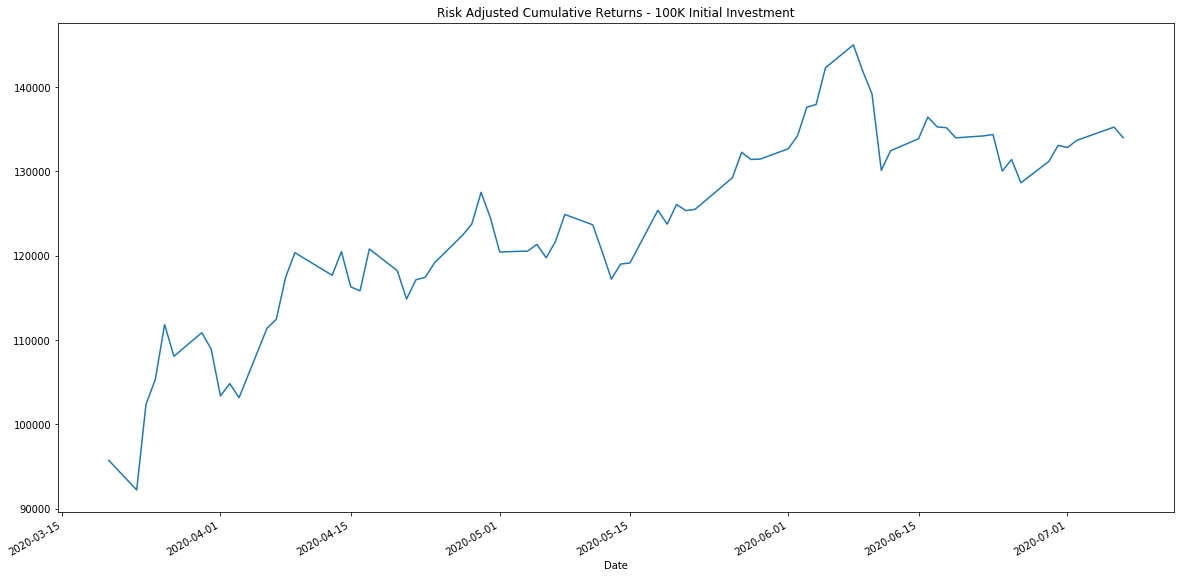

In [13]:
# Plot the portfolio returns - assuming an initial investment of $100,000
initial_investment = 100000
ra_cumulative_profit = initial_investment * ra_cumulative_returns
ra_cumulative_profit.plot(kind='line',figsize=(20,10),title='Risk Adjusted Cumulative Returns - 100K Initial Investment');

---

In [14]:
# Re-calculate daily returns, revert back to original dataset
daily_returns = sp500_df.pct_change()
daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,-0.002808,0.005444,0.011308,-0.013320,0.009258,0.010105,0.001396,0.001282,0.020435,0.010733,...,0.013105,0.012115,-0.016556,-0.029303,-0.014690,0.012878,0.012585,-0.004944,-0.031945,0.008981
2019-07-03,0.005517,0.008122,0.009834,-0.000612,0.012566,0.014173,0.014300,-0.001600,0.005257,0.019469,...,0.003083,0.009310,0.023569,-0.010289,0.001924,0.000721,0.027976,0.007881,0.011594,0.006545
2019-07-05,-0.017031,-0.002569,-0.026281,0.000536,0.002199,-0.010481,-0.005626,0.009939,-0.000062,-0.009259,...,-0.004274,-0.000329,-0.001096,-0.002406,-0.005880,-0.006668,-0.002253,0.001360,0.018514,-0.010057
2019-07-08,-0.016337,-0.003863,-0.024250,-0.014113,-0.005643,-0.034891,-0.003487,0.017143,-0.015129,0.001752,...,0.001882,0.002636,-0.021405,-0.001550,-0.013761,-0.001723,-0.030409,0.024531,-0.019260,-0.000701


In [15]:
# Calculate matrix of correlation coefficients between S&P500 returns
correlation = daily_returns.corr()
correlation

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
MMM,1.000000,0.633915,0.569229,0.331024,0.677804,0.321305,0.511527,0.526475,0.573148,0.528599,...,0.532130,0.531210,0.559297,0.626255,0.734686,0.569519,0.636098,0.588696,0.683844,0.583450
ABT,0.633915,1.000000,0.648260,0.397108,0.720426,0.515139,0.656484,0.559191,0.495733,0.356549,...,0.333366,0.695656,0.414495,0.592998,0.637905,0.532563,0.568316,0.479565,0.470849,0.730194
ABBV,0.569229,0.648260,1.000000,0.251080,0.656355,0.476912,0.618305,0.565373,0.508566,0.497634,...,0.410526,0.518038,0.475015,0.496311,0.572216,0.466423,0.518946,0.502120,0.474458,0.632663
ABMD,0.331024,0.397108,0.251080,1.000000,0.308943,0.164513,0.277472,0.219143,0.283958,0.157809,...,0.240415,0.247909,0.198054,0.260128,0.255987,0.213398,0.319344,0.276135,0.296373,0.253313
ACN,0.677804,0.720426,0.656355,0.308943,1.000000,0.470843,0.764578,0.594268,0.561012,0.676219,...,0.537970,0.644464,0.658614,0.624133,0.717833,0.662103,0.653093,0.669705,0.643663,0.730859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.569519,0.532563,0.466423,0.213398,0.662103,0.159565,0.431411,0.439220,0.556930,0.532928,...,0.561918,0.551948,0.586882,0.423950,0.571116,1.000000,0.402759,0.658166,0.483146,0.668594
ZBRA,0.636098,0.568316,0.518946,0.319344,0.653093,0.387943,0.611340,0.535248,0.491750,0.536697,...,0.514186,0.469222,0.539913,0.589666,0.633861,0.402759,1.000000,0.482747,0.598004,0.554999
ZBH,0.588696,0.479565,0.502120,0.276135,0.669705,0.187235,0.448404,0.398142,0.455374,0.621215,...,0.620970,0.373248,0.696508,0.376490,0.563208,0.658166,0.482747,1.000000,0.563016,0.602605
ZION,0.683844,0.470849,0.474458,0.296373,0.643663,0.208393,0.473613,0.425763,0.526596,0.651540,...,0.616445,0.447877,0.651892,0.559984,0.713653,0.483146,0.598004,0.563016,1.000000,0.503315


In [16]:
# Sum correlation coefficient for each stock across the matrix, to remove highest 50
correlation_rank = correlation.sum().sort_values(axis=0,ascending=False)
correlation_rank.head(50)

BRK-B    345.967628
AMP      345.010932
MET      343.722331
GL       343.142316
DOV      342.693270
MS       340.467571
BAC      340.404092
PRU      338.987749
LNC      338.899210
PNC      338.771541
JPM      338.118327
C        337.250669
ADP      337.040296
V        336.782928
AME      336.445790
GS       335.351949
AXP      335.016522
WY       334.717683
PH       333.717957
L        331.987519
HON      331.497829
GPN      329.828304
PFG      329.104020
GD       328.290752
CSX      328.216481
ADM      327.653717
ACN      327.536686
APH      327.091665
WFC      326.907478
NSC      326.905360
MA       326.522625
LIN      326.396234
SWK      326.068175
GLW      325.884733
MCO      325.650619
FITB     325.315303
COF      325.179726
ITW      325.167001
MDT      324.957293
IBM      324.604674
IQV      324.601625
SYF      324.438781
CE       324.157913
DTE      324.033175
USB      323.752832
PNR      323.291029
TEL      323.231232
CTSH     323.054240
DE       322.658571
TFC      322.583499


In [17]:
# Drop top 10% of S&P 500 to created the Diversified Portfolio
dv_daily_returns = daily_returns.drop(columns=['IBM','MET','DOV','GL','BRK-B','GLW','CSX','BAC','EXC','CTSH','V','AMP','ETFC','HON','CBRE','SWK','PNC','ADM','PAYX','ITW','PRU','MS','ADP','PH','UNP','ETN','GPN','LIN','T','AXP','SBUX','SYK','C','AME','NSC','PNR','GPC','LNC','TEL','SNA','FISV','L','VAR','PNW','KO','GS','JPM','DE','MDT','GRMN'])
dv_daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,-0.002808,0.005444,0.011308,-0.013320,0.009258,0.010105,0.001396,0.001282,0.020435,0.010733,...,0.013105,0.012115,-0.016556,-0.029303,-0.014690,0.012878,0.012585,-0.004944,-0.031945,0.008981
2019-07-03,0.005517,0.008122,0.009834,-0.000612,0.012566,0.014173,0.014300,-0.001600,0.005257,0.019469,...,0.003083,0.009310,0.023569,-0.010289,0.001924,0.000721,0.027976,0.007881,0.011594,0.006545
2019-07-05,-0.017031,-0.002569,-0.026281,0.000536,0.002199,-0.010481,-0.005626,0.009939,-0.000062,-0.009259,...,-0.004274,-0.000329,-0.001096,-0.002406,-0.005880,-0.006668,-0.002253,0.001360,0.018514,-0.010057
2019-07-08,-0.016337,-0.003863,-0.024250,-0.014113,-0.005643,-0.034891,-0.003487,0.017143,-0.015129,0.001752,...,0.001882,0.002636,-0.021405,-0.001550,-0.013761,-0.001723,-0.030409,0.024531,-0.019260,-0.000701


In [18]:
# Calculate the annualized sharpe ratio on the Diversified Portfolio
sharpe_ratios = (dv_daily_returns.mean()*252) / (dv_daily_returns.std()*np.sqrt(252))
sharpe_ratios.sort_values(axis=0,ascending=True,inplace=True)
sharpe_ratios.head(50)

FTI     -1.115216
UAA     -1.013787
UA      -1.013434
XRX     -0.983216
HRB     -0.912415
XOM     -0.841410
TAP     -0.791842
WFC     -0.786218
ADS     -0.756255
FLS     -0.734566
DXC     -0.730206
VIAC    -0.712979
BEN     -0.706103
DISCK   -0.669655
CXO     -0.664790
MTB     -0.657172
OMC     -0.656245
CMA     -0.637293
DAL     -0.623213
DVN     -0.618302
SLB     -0.614261
DISCA   -0.607122
HPE     -0.594831
TPR     -0.586846
SPG     -0.575031
HST     -0.570116
F       -0.567361
UNM     -0.563992
UAL     -0.560596
EOG     -0.559987
AAL     -0.551953
MRO     -0.550917
VNO     -0.537156
FANG    -0.531994
AFL     -0.523841
RL      -0.517820
CF      -0.511098
CCL     -0.511017
AIG     -0.501763
COTY    -0.498034
IVZ     -0.493537
MOS     -0.485827
OKE     -0.480619
FOX     -0.468234
PVH     -0.467581
LUV     -0.462522
NLSN    -0.459970
FRT     -0.457997
XRAY    -0.457693
PFE     -0.457058
dtype: float64

In [19]:
# Drop 10% of S&P 500 with lowest Sharpe ratios to create the Diversified, Optimized Portfolio
dv_op_daily_returns = dv_daily_returns.drop(columns=['HWM','WBA','ED','MSI','CINF','PBCT','JWN','TAP','BIIB','WFC','TIF','XRX','SJM','KR','DISCA','GILD','DISCK','MTB','EQR','HRB','NI','NLSN','WEC','HII','CTL','RL','HRL','ATO','AEP','AEE','OMC','HPE','RJF','XYL','NOC','COO','D','SLG','SO','TPR','VZ','GE','WAT','PSA','COST','BXP','CPB','WM','CMS','IRM'])
dv_op_daily_returns.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WMB,WLTW,WYNN,XEL,XLNX,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,-0.002808,0.005444,0.011308,-0.013320,0.009258,0.010105,0.001396,0.001282,0.020435,0.010733,...,0.004989,0.006239,0.013105,0.012115,-0.029303,0.012878,0.012585,-0.004944,-0.031945,0.008981
2019-07-03,0.005517,0.008122,0.009834,-0.000612,0.012566,0.014173,0.014300,-0.001600,0.005257,0.019469,...,0.006738,0.003023,0.003083,0.009310,-0.010289,0.000721,0.027976,0.007881,0.011594,0.006545
2019-07-05,-0.017031,-0.002569,-0.026281,0.000536,0.002199,-0.010481,-0.005626,0.009939,-0.000062,-0.009259,...,-0.001409,0.000511,-0.004274,-0.000329,-0.002406,-0.006668,-0.002253,0.001360,0.018514,-0.010057
2019-07-08,-0.016337,-0.003863,-0.024250,-0.014113,-0.005643,-0.034891,-0.003487,0.017143,-0.015129,0.001752,...,0.003175,-0.005974,0.001882,0.002636,-0.001550,-0.001723,-0.030409,0.024531,-0.019260,-0.000701


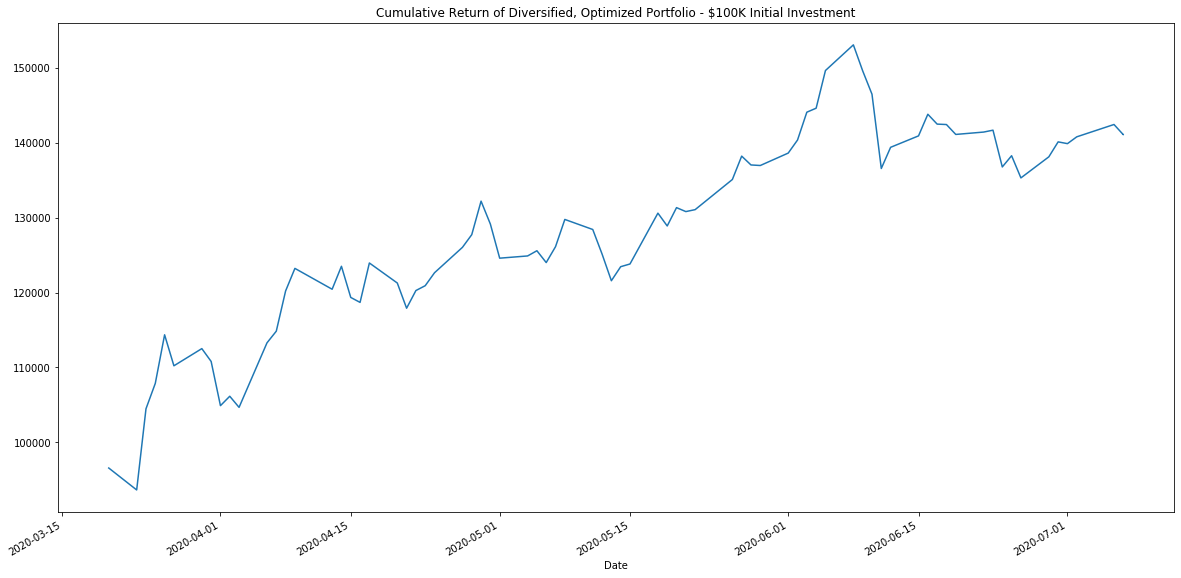

In [20]:
# Calculate Cumulative Diversified, Optimized Portfolio Returns, and Plot $100,000 Investment Over Time for Optimized Portfolio
weights = []
for ticker in dv_op_daily_returns:
    weights.append(1/len(dv_op_daily_returns.columns))
dv_op_portfolio_returns = dv_op_daily_returns.dot(weights)
dv_op_cum_portfolio_return = (1 + dv_op_portfolio_returns).cumprod()
in_inv = 100000
dv_op_cum_port_rtn_val = (dv_op_cum_portfolio_return * in_inv)
dv_op_cum_port_rtn_val.plot(kind='line',figsize=(20,10),title='Cumulative Return of Diversified, Optimized Portfolio - $100K Initial Investment');

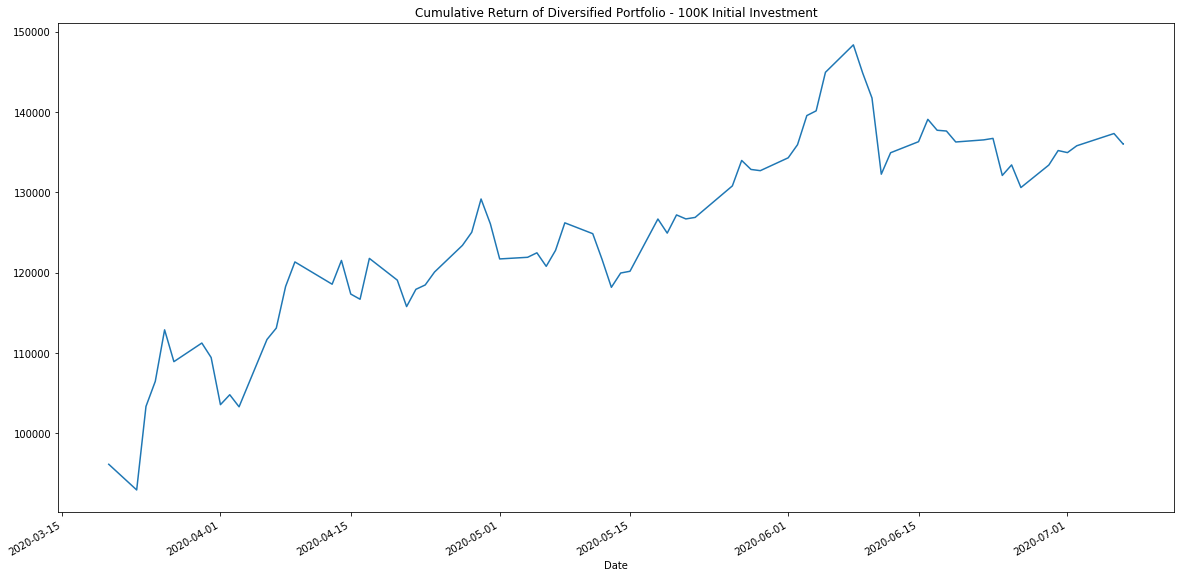

In [21]:
# Calculate Cumulative Returns of Diversified Portfolio, and Plot $100,000 Investment
weights = []
for ticker in dv_daily_returns:
    weights.append(1/len(dv_daily_returns.columns))
dv_portfolio_returns = dv_daily_returns.dot(weights)
dv_cum_rtn_port = (1 + dv_portfolio_returns).cumprod()
in_inv = 100000
dv_cum_rtn_port_val = (dv_cum_rtn_port * in_inv)
dv_cum_rtn_port_val.plot(kind='line',figsize=(20,10),title='Cumulative Return of Diversified Portfolio - 100K Initial Investment');

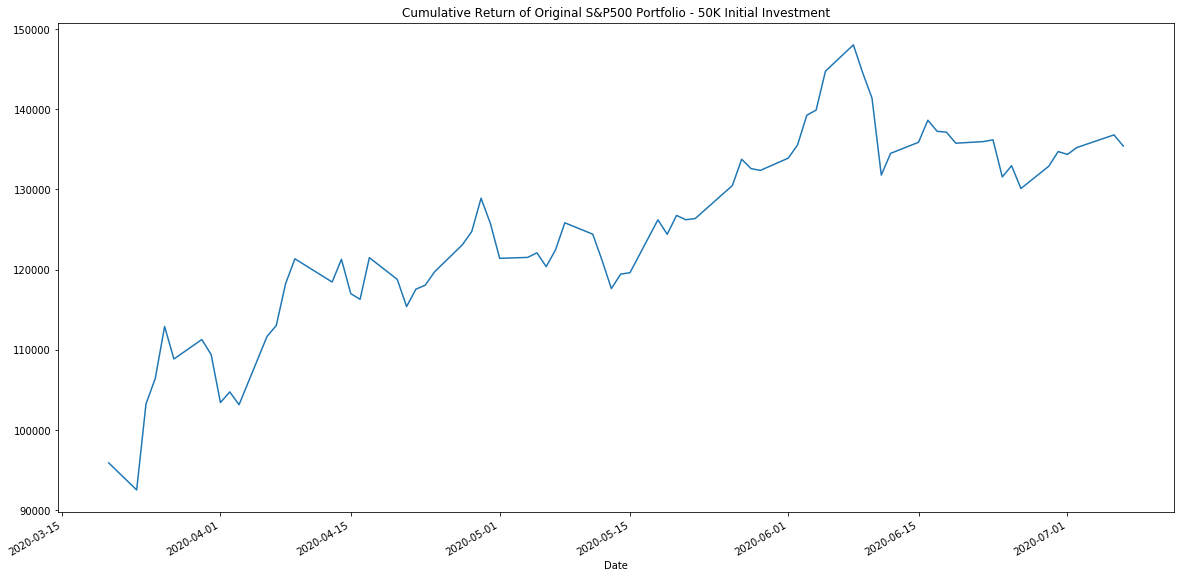

In [22]:
# Calculate Cumulative Returns for the original S&P500 portfolio, and Plot $500,000 Investment
weights = []
for ticker in daily_returns:
    weights.append(1/len(daily_returns.columns))
portfolio_returns = daily_returns.dot(weights)
cum_rtn_port = (1 + portfolio_returns).cumprod()
in_inv = 100000
cum_rtn_port_val = (cum_rtn_port * in_inv)
cum_rtn_port_val.plot(kind='line',figsize=(20,10),title='Cumulative Return of Original S&P500 Portfolio - 50K Initial Investment');

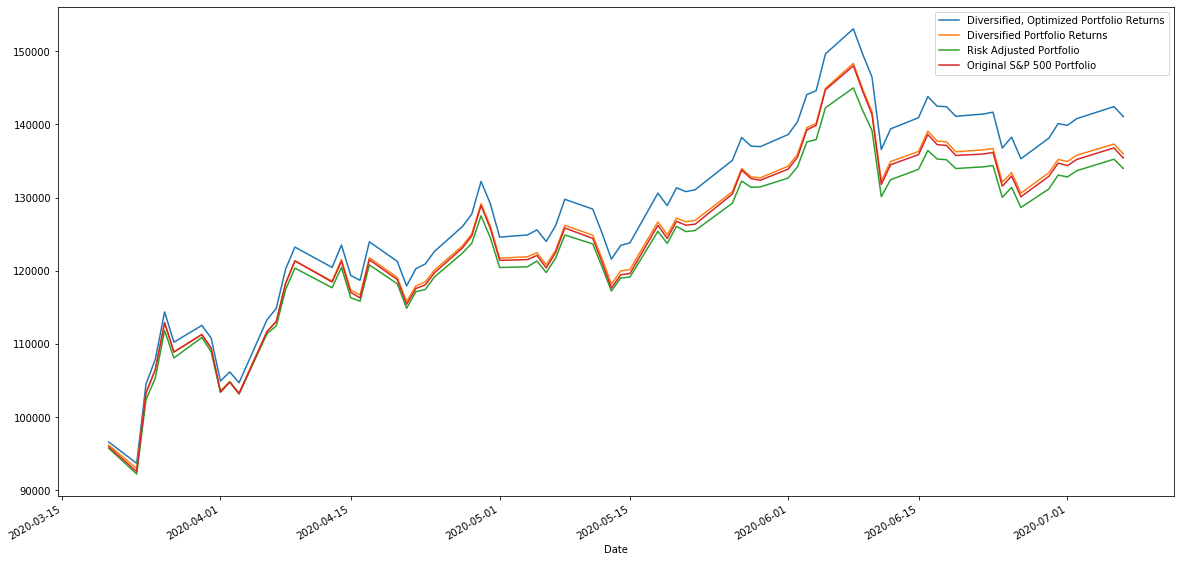

In [28]:
# Overlay the main hypothetical portfolios, with an initial investment of $500K
axis = dv_op_cum_port_rtn_val.plot(figsize=(20,10))
dv_cum_rtn_port_val.plot(ax=axis)
ra_cumulative_profit.plot(ax=axis)
cum_rtn_port_val.plot(ax=axis)

axis.legend(['Diversified, Optimized Portfolio Returns',
           'Diversified Portfolio Returns',
           'Risk Adjusted Portfolio',
           'Original S&P 500 Portfolio']);
